<a href="https://colab.research.google.com/github/Kathan-Vakharia/Exploring-Hacker-News-Data/blob/main/Exploring_Hacker_News_Post.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Insights from Hacker News Posts

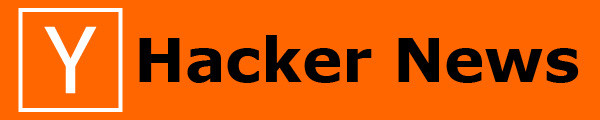

# Abstract
[Hacker News](https://news.ycombinator.com/) is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

Our aim here to analyse posts with the following  special keywords in `title` of the post,

1. Ask HN - Posts asking questions.
2. Show HN - Posts to showcase some work.


# The Dataset
Our dataset contains following columns,
1. `id`: The unique identifier from Hacker News for the post
2. `title`: The title of the post
3. `url`: The URL that the posts links to, if the post has a URL
4. `num_points`: The number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
5. `num_comments`: The number of comments that were made on the post
6. `author`: The username of the person who submitted the post
7. `created_at`: The date and time at which the post was submitted (the time zone is Eastern Time in the US)

## Note: 
1. It is simplied version of [this](https://www.kaggle.com/hacker-news/hacker-news-posts) kaggle dataset.

2. It only contains entries in which there was atleast 1 comment.

# ❓ Questions To Answer 
- Which type of posts(Ask HN or Show HN) receive  more comments?
- Is there a relation betwen number of comments and time when the post was published?

# Step1 - Data Extraction and Exploration

In [ ]:
import csv

# reading data as a list of lists
with open("hacker_news.csv") as opened_file:
    hn = list(csv.reader(opened_file))
    headers = hn[0] 
    hn = hn[1:]

In [ ]:
# Dimensions of dataset
print(f"rows: {len(hn)}\ncols: {len(headers)}")

rows: 20100
cols: 7


In [ ]:
#display first five rows
print(headers, "\n")
hn[:5]

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'] 



[['12224879',
  'Interactive Dynamic Video',
  'http://www.interactivedynamicvideo.com/',
  '386',
  '52',
  'ne0phyte',
  '8/4/2016 11:52'],
 ['10975351',
  'How to Use Open Source and Shut the Fuck Up at the Same Time',
  'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/',
  '39',
  '10',
  'josep2',
  '1/26/2016 19:30'],
 ['11964716',
  "Florida DJs May Face Felony for April Fools' Water Joke",
  'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/',
  '2',
  '1',
  'vezycash',
  '6/23/2016 22:20'],
 ['11919867',
  'Technology ventures: From Idea to Enterprise',
  'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429',
  '3',
  '1',
  'hswarna',
  '6/17/2016 0:01'],
 ['10301696',
  'Note by Note: The Making of Steinway L1037 (2007)',
  'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0',
  '8',
  '2',
  'walterbell',
  '9/30/2015 4:12']]

# Step2 - Filtering rows

In [ ]:
#lists to store different types of post
ask_posts = []
show_posts = []
other_posts = []

for post in hn:
    #extracting "title" as lowercase 
    title = post[1].lower()

    #updating the list with respective posts
    if title.startswith("ask hn"):
        ask_posts.append(post)
    elif title.startswith("show hn"):
        show_posts.append(post)
    else:
        other_posts.append(post)

In [ ]:
print(f"Number of 'Ask HN' posts: {len(ask_posts)}")
print(f"Number of 'Show HN' posts: {len(show_posts)}")
print(f"Number of 'Other' posts: {len(other_posts)}")

Number of 'Ask HN' posts: 1744
Number of 'Show HN' posts: 1162
Number of 'Other' posts: 17194


In [ ]:
#Exploring Ask HN posts
ask_posts[:4]

[['12296411',
  'Ask HN: How to improve my personal website?',
  '',
  '2',
  '6',
  'ahmedbaracat',
  '8/16/2016 9:55'],
 ['10610020',
  'Ask HN: Am I the only one outraged by Twitter shutting down share counts?',
  '',
  '28',
  '29',
  'tkfx',
  '11/22/2015 13:43'],
 ['11610310',
  'Ask HN: Aby recent changes to CSS that broke mobile?',
  '',
  '1',
  '1',
  'polskibus',
  '5/2/2016 10:14'],
 ['12210105',
  'Ask HN: Looking for Employee #3 How do I do it?',
  '',
  '1',
  '3',
  'sph130',
  '8/2/2016 14:20']]

In [ ]:
#Exploring Show HN posts
show_posts[:4]

[['10627194',
  'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform',
  'https://iot.seeed.cc',
  '26',
  '22',
  'kfihihc',
  '11/25/2015 14:03'],
 ['10646440',
  'Show HN: Something pointless I made',
  'http://dn.ht/picklecat/',
  '747',
  '102',
  'dhotson',
  '11/29/2015 22:46'],
 ['11590768',
  'Show HN: Shanhu.io, a programming playground powered by e8vm',
  'https://shanhu.io',
  '1',
  '1',
  'h8liu',
  '4/28/2016 18:05'],
 ['12178806',
  'Show HN: Webscope  Easy way for web developers to communicate with Clients',
  'http://webscopeapp.com',
  '3',
  '3',
  'fastbrick',
  '7/28/2016 7:11']]

# Step3 - Analysing comments on __Ask HN__ and __Show HN__ posts

In [ ]:
def get_total_commments(posts:list, index:int)->int:
    '''Function to find total number of comments for given `posts` as a list
    of lists and `index` of the "num_comments" column. '''
    cnt = 0
    for post in posts:
        cnt += int(post[index])
    return cnt

In [ ]:
def get_avg(comment_cnt:int, post_cnt:int)->float:
    '''Function to find average number of comments given `comment_cnt` and
    `post_cnt` as number of comments and number of posts respectively.'''
    return comment_cnt/post_cnt

In [ ]:
#Getting Total and Average comments on Ask HN posts
total_ask_comments = get_total_commments(ask_posts, 4 #index of num_comments column
                                        )
avg_ask_comments = get_avg(total_ask_comments, len(ask_posts))

print(f"Total comments on 'Ask HN' posts: {total_ask_comments}")
print(f"Average comments on 'Ask HN' posts: {avg_ask_comments:0.3f}")

Total comments on 'Ask HN' posts: 24483
Average comments on 'Ask HN' posts: 14.038


In [ ]:
#Getting Total and Average comments on Show HN posts
total_show_comments = get_total_commments(show_posts, 4 #index of num_comments column
                                        )
avg_show_comments = get_avg(total_show_comments, len(show_posts))

print(f"Total comments on 'Show HN' posts: {total_show_comments}")
print(f"Average comments on 'Show HN' posts: {avg_show_comments:0.3f}")

Total comments on 'Show HN' posts: 11988
Average comments on 'Show HN' posts: 10.317


So, __Ask HN Posts__ get more comments than __Show HN Posts__ on an average. 
>Since ask posts are more likely to receive comments, we'll focus our remaining analysis just on these posts.

# Step4 - Calculate the amount of __Ask Posts__ created per hour, along with the total amount of comments.

Note: `created_at` column is of form __MM/DD/YYYY H:M__

[strftime format codes](https://strftime.org/)

In [ ]:
import datetime as dt #to parse "created_at" 

def get_time(created_at:str, inp_fmt:str, out_fmt:str)->str:
    '''Function which parses the `created_at` string as `inp_fmt`
    and returns the formatted time pertaining to `out_fmt`'''

    dt_obj = dt.datetime.strptime(created_at, inp_fmt)
    return dt_obj.strftime(out_fmt)

In [ ]:
#extracting created_at and num_comments for posts in ask_posts
results_list = []
for post in ask_posts:
    created_at = post[6]
    comments = int(post[4])
    #converting "MM/DD/YYYY H:M" to "H"
    created_at = get_time(created_at, inp_fmt="%m/%d/%Y %H:%M", out_fmt="%H")
    
    results_list.append([created_at, comments])

In [ ]:
#list of lists where each list = [Hour, #comments]
results_list[:10]

[['09', 6],
 ['13', 29],
 ['10', 1],
 ['14', 3],
 ['16', 17],
 ['23', 1],
 ['12', 4],
 ['09', 1],
 ['17', 1],
 ['17', 2]]

In [ ]:
#Creating our required frequency tables
counts_by_hour = {}
comments_by_hour = {}

for val in results_list:
    hour = val[0]
    comments = val[1]

    #if given hour not present as a key, create it
    counts_by_hour.setdefault(hour, 0)
    comments_by_hour.setdefault(hour, 0)

    #update the value for given hour
    counts_by_hour[hour] += 1
    comments_by_hour[hour] += comments

In [ ]:
comments_by_hour

{'00': 447,
 '01': 683,
 '02': 1381,
 '03': 421,
 '04': 337,
 '05': 464,
 '06': 397,
 '07': 267,
 '08': 492,
 '09': 251,
 '10': 793,
 '11': 641,
 '12': 687,
 '13': 1253,
 '14': 1416,
 '15': 4477,
 '16': 1814,
 '17': 1146,
 '18': 1439,
 '19': 1188,
 '20': 1722,
 '21': 1745,
 '22': 479,
 '23': 543}

- We can se there are lot of comments from **1p.m. till 10p.m.**

In [ ]:
counts_by_hour

{'00': 55,
 '01': 60,
 '02': 58,
 '03': 54,
 '04': 47,
 '05': 46,
 '06': 44,
 '07': 34,
 '08': 48,
 '09': 45,
 '10': 59,
 '11': 58,
 '12': 73,
 '13': 85,
 '14': 107,
 '15': 116,
 '16': 108,
 '17': 100,
 '18': 109,
 '19': 110,
 '20': 80,
 '21': 109,
 '22': 71,
 '23': 68}

# Step5 - Calculating the Average Number of Comments for __Ask HN__ Posts by Hour



In [ ]:
avg_by_hour = []
for hour, n_comments in comments_by_hour.items():
    avg_by_hour.append([hour,
                        round(n_comments/counts_by_hour[hour], 3)]
    )       

In [ ]:
avg_by_hour

[['09', 5.578],
 ['13', 14.741],
 ['10', 13.441],
 ['14', 13.234],
 ['16', 16.796],
 ['23', 7.985],
 ['12', 9.411],
 ['17', 11.46],
 ['15', 38.595],
 ['21', 16.009],
 ['20', 21.525],
 ['02', 23.81],
 ['18', 13.202],
 ['03', 7.796],
 ['05', 10.087],
 ['19', 10.8],
 ['01', 11.383],
 ['22', 6.746],
 ['08', 10.25],
 ['04', 7.17],
 ['00', 8.127],
 ['06', 9.023],
 ['07', 7.853],
 ['11', 11.052]]

In [ ]:
#sorting the list to get better sense of distribution
sorted_avg_by_hour = sorted(avg_by_hour, key=lambda x:x[1], reverse=True)
sorted_avg_by_hour

[['15', 38.595],
 ['02', 23.81],
 ['20', 21.525],
 ['16', 16.796],
 ['21', 16.009],
 ['13', 14.741],
 ['10', 13.441],
 ['14', 13.234],
 ['18', 13.202],
 ['17', 11.46],
 ['01', 11.383],
 ['11', 11.052],
 ['19', 10.8],
 ['08', 10.25],
 ['05', 10.087],
 ['12', 9.411],
 ['06', 9.023],
 ['00', 8.127],
 ['23', 7.985],
 ['07', 7.853],
 ['03', 7.796],
 ['04', 7.17],
 ['22', 6.746],
 ['09', 5.578]]

In [ ]:
print("\tTop 5 Hours for Ask Posts Comments")
for hour, avg in sorted_avg_by_hour[:5]:
    print(f"{dt.datetime.strptime(hour, '%H').strftime('%H:%M')} : "
          f"{avg:0.2f} average comments per post.")

	Top 5 Hours for Ask Posts Comments
15:00 : 38.59 average comments per post.
02:00 : 23.81 average comments per post.
20:00 : 21.52 average comments per post.
16:00 : 16.80 average comments per post.
21:00 : 16.01 average comments per post.


- The hour that receives the most comments per post on average is 15:00, with an average of 38.59 comments per post. 
- There's about a 60% increase in the number of comments between the hours with the highest and second highest average number of comments.

    > So the best time to post is 3p.m. EST


# Step6 - Template to convert Time to any timezone
```python
delta = dt.timedelta(hours=9, minutes=30) 
est = dt.time(hour=16, minute=40) #given time in EST/EDT
your_time = (dt.datetime.combine(dt.date(1, 1, 1), #dummy date
                                 est) + delta ).time()
```



In [ ]:
#Template to convert Time to IST
#IST(Indian Stadard Time is 9 hours and 30 mins ahead of EST/EDT)
IST_delta = dt.timedelta(hours=9, minutes=30) 
est = dt.time(hour=16, minute=40)
ist = (dt.datetime.combine(dt.date(1, 1, 1), #dummy date
                         est) + IST_delta 
       ).time()
print(f"EST Time: {est}, IST:{ist}")

EST Time: 16:40:00, IST:02:10:00


# Conclusion

We can say that out of all posts that had comments on them, 

- __ask posts__ received more comments than __show posts__.
- And  __ask posts__ created between 15:00 and 16:00 (3:00 pm est - 4:00 pm est) received the most comments on average.